In [1]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

base_model_path = "runwayml/stable-diffusion-v1-5"
controlnet_path = "./map_model_adjusted"

controlnet = ControlNetModel.from_pretrained(controlnet_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet, torch_dtype=torch.float16
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
# pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()
pipe.safety_checker = lambda images, clip_input: (images, False)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [113]:
controlnet_path2 = "./map_model"
controlnet2 = ControlNetModel.from_pretrained(controlnet_path2, torch_dtype=torch.float16)

pipe2 = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, controlnet=controlnet2, torch_dtype=torch.float16
)

# speed up diffusion process with faster scheduler and memory optimization
pipe2.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
# pipe.enable_xformers_memory_efficient_attention()

pipe2.enable_model_cpu_offload()
pipe2.safety_checker = lambda images, clip_input: (images, False)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [2]:
import matplotlib.pyplot as plt

In [14]:
control_image = load_image("./inputs_inf/938376_thin.jpg") 
prompt = "crowded city"

In [15]:
generator = torch.manual_seed(0)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

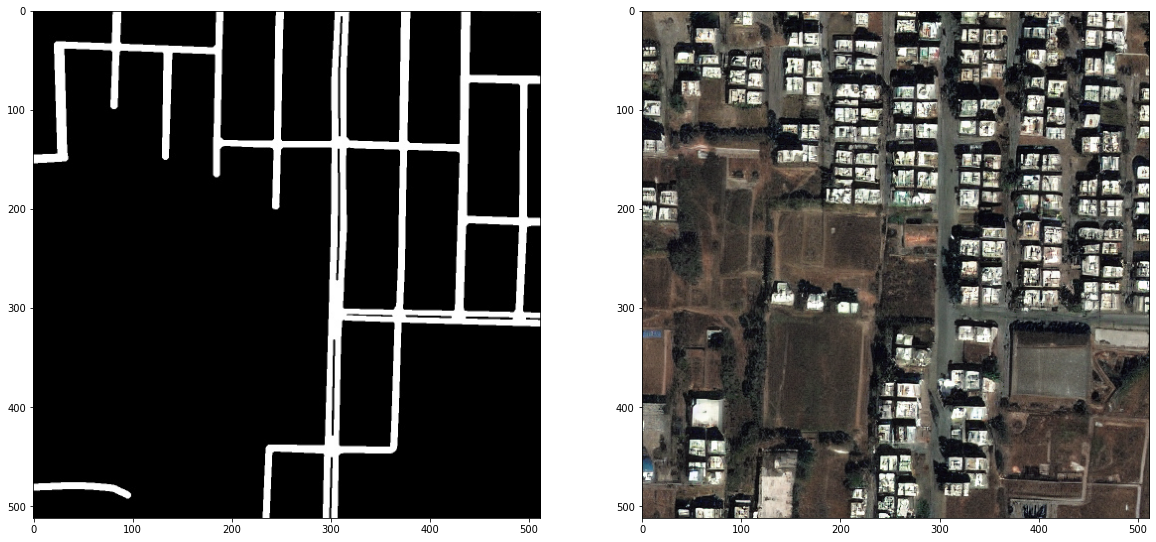

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(control_image)
axs[1].imshow(image)

In [144]:
control_image = load_image("./inputs_inf/24185_thin.jpg") 
prompt = "overhead satellite image, busy city, extremely good quality, road, high resolution, 8K"

In [145]:
generator = torch.manual_seed(1)
image = pipe(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]
generator = torch.manual_seed(1)
image2 = pipe2(
     prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

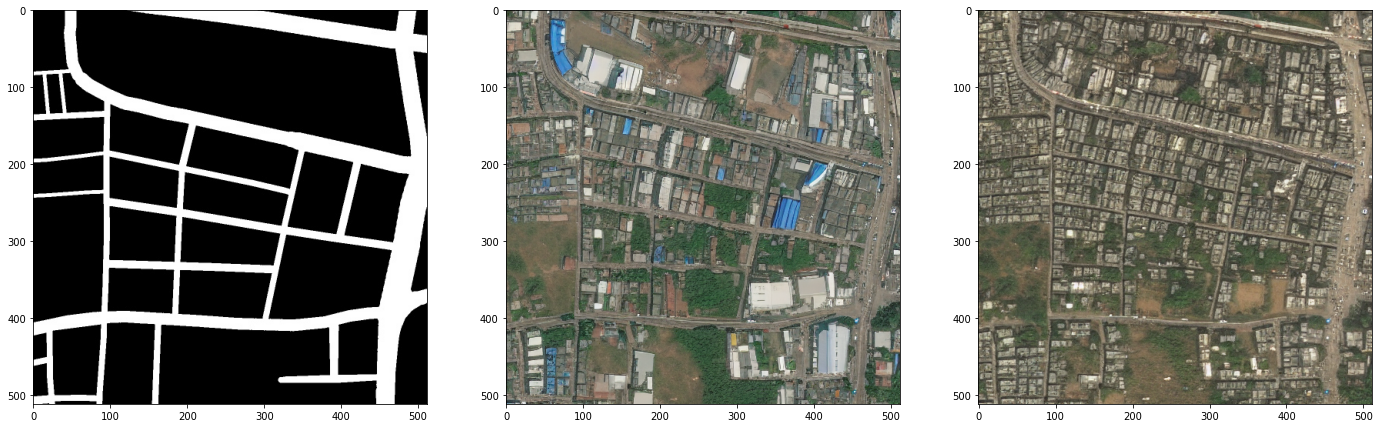

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].imshow(control_image)
axs[1].imshow(image)
axs[2].imshow(image2)
# image.save("./outputs_inf/test_with_cloud_prompt_938376.png")

In [105]:
image.save("./outputs_inf/test_modified_just_road_602.png")
image2.save("./outputs_inf/test_thick_just_road_602.png")

  0%|          | 0/20 [00:00<?, ?it/s]

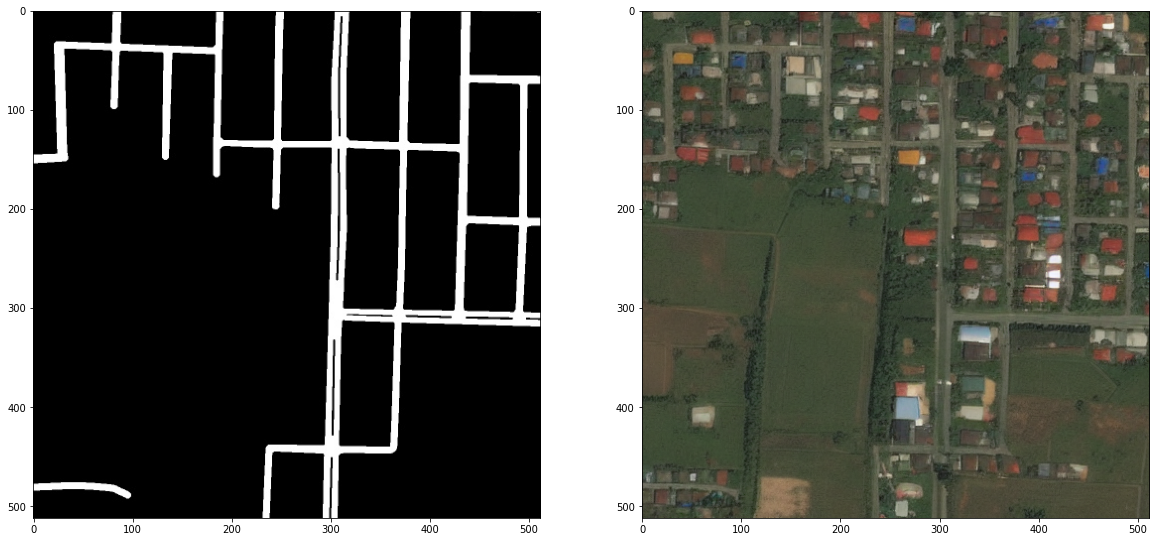

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(control_image)
axs[1].imshow(image2)
# image.save("./outputs_inf/test_with_cloud_prompt_938376.png")